In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


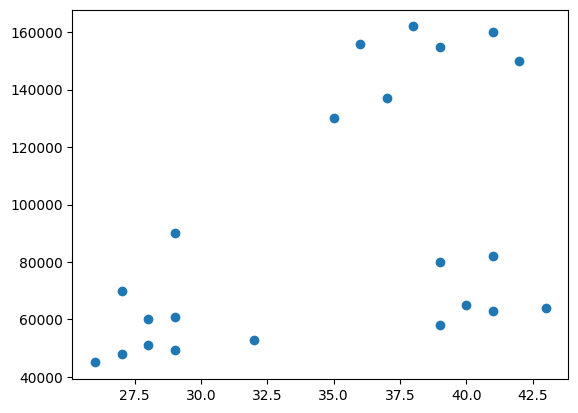

In [3]:
plt.scatter(df['Age'],df['Income($)'])

In [5]:
from sklearn.cluster import KMeans

In [7]:
km=KMeans( n_clusters=3)
km

KMeans(n_clusters=3)

In [9]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2


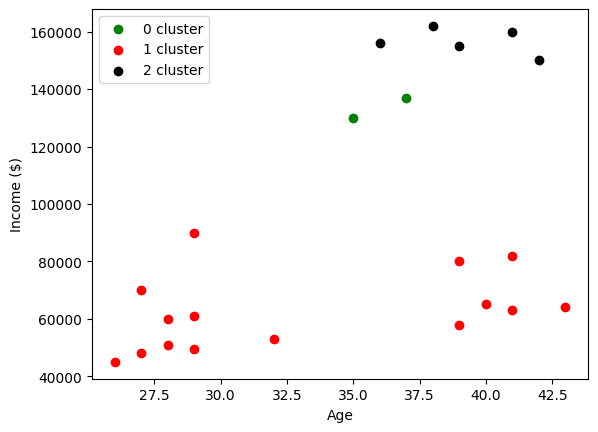

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='0 cluster')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='1 cluster')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='2 cluster')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [22]:
# We need to scale the features to make the graph look what it is supposed to

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [31]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [32]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [34]:
ke = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [39]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [40]:
df['n_cluster']=y_pred
df.head()

,Name,Age,Income($),cluster,n_cluster
0,Rob,0.058824,0.213675,1,0
1,Michael,0.176471,0.384615,1,0
2,Mohan,0.176471,0.136752,1,0
3,Ismail,0.117647,0.128205,1,0
4,Kory,0.941176,0.897436,2,1


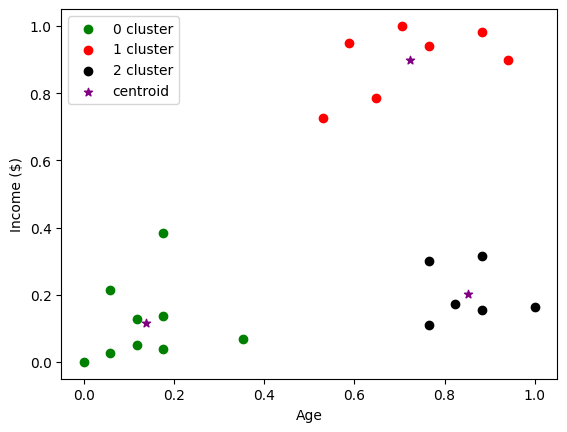

In [42]:
df1 = df[df.n_cluster==0]
df2 = df[df.n_cluster==1]
df3 = df[df.n_cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='0 cluster')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='1 cluster')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='2 cluster')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color ='purple', marker = '*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [37]:
# Now it is perfectly belonging to it's specified cluster with centroids in it.

In [43]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_) #this fucntion give the sum of square error

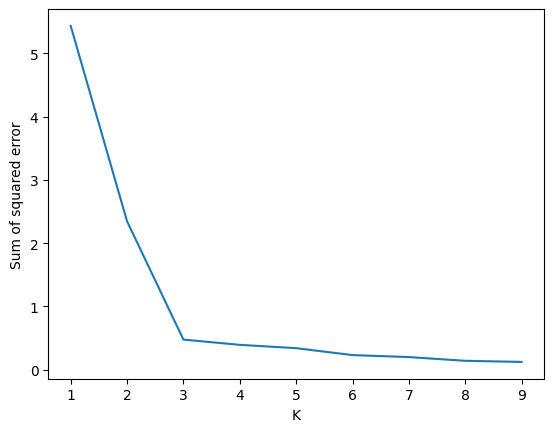

In [44]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [45]:
# As, it can be seen , 3 clusters is the most optimum value

In [48]:
from sklearn.datasets import load_iris

In [49]:
iris=load_iris()

In [51]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [53]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [54]:
df.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
136,6.3,3.4,5.6,2.4


In [58]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [59]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)

In [60]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [61]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scalar.transform(df[['petal length (cm)']])

In [62]:
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.2
1,0.067797,0.2
2,0.050847,0.2
3,0.084746,0.2
4,0.067797,0.2


In [64]:
scalar.fit(df[['petal width (cm)']])
df['petal width (cm)']=scalar.transform(df[['petal width (cm)']])
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


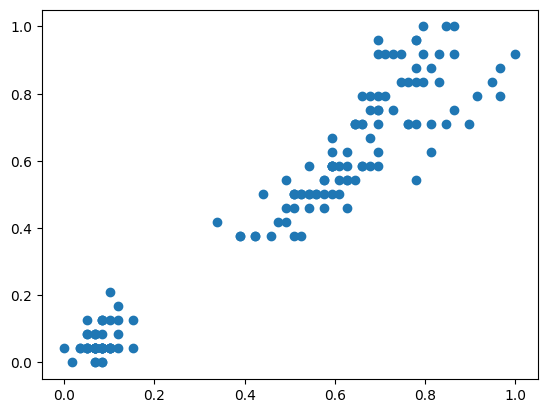

In [66]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [68]:
nkm=KMeans(n_clusters=2)
y_pred = nkm.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
df['cluster']=y_pred
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


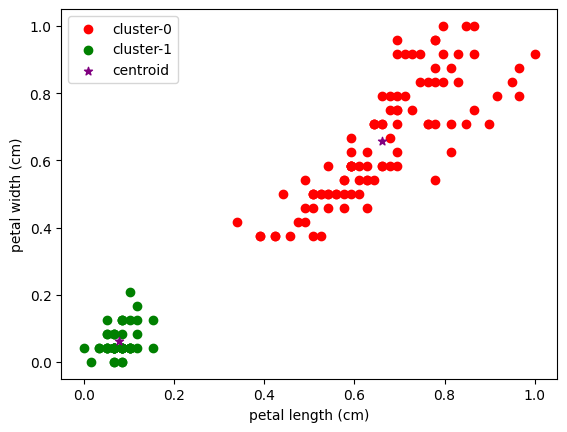

In [80]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',label='cluster-0')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green',label='cluster-1')
plt.scatter(nkm.cluster_centers_[:,0],nkm.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [78]:
nkm.cluster_centers_

array([[0.6620339 , 0.65666667],
       [0.07830508, 0.06083333]])

In [86]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    nkm=KMeans(n_clusters=k)
    nkm.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(nkm.inertia_)

In [87]:
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1615234094205578,
 0.8636950746677041,
 0.6801035704886196,
 0.5673451458363143,
 0.4925856684302084,
 0.44637197236397236]

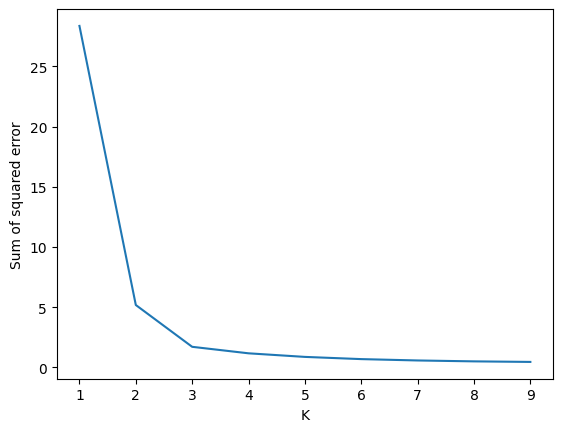

In [88]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [91]:
nkm=KMeans(n_clusters=3)
n_y = nkm.fit_predict(df)

In [92]:
df['n_clusters']=n_y

In [93]:
df.head()

,petal length (cm),petal width (cm),cluster,n_clusters
0,0.067797,0.041667,1,0
1,0.067797,0.041667,1,0
2,0.050847,0.041667,1,0
3,0.084746,0.041667,1,0
4,0.067797,0.041667,1,0


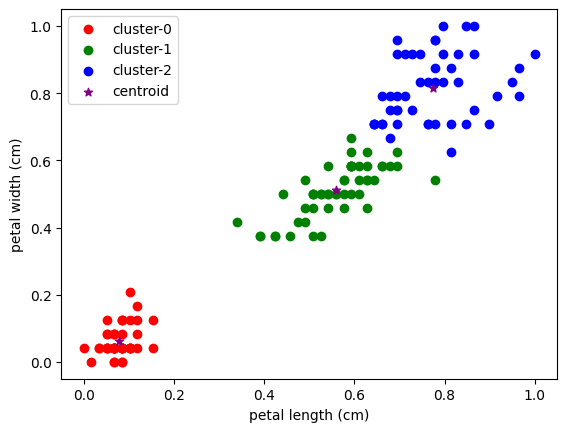

In [97]:
df1=df[df.n_clusters==0]
df2=df[df.n_clusters==1]
df3=df[df.n_clusters==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',label='cluster-0')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green',label='cluster-1')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue',label='cluster-2')
plt.scatter(nkm.cluster_centers_[:,0],nkm.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()